In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat_folder = '/nrs/ahrens/Ziqiang/Takashi_DRN_project/'
dat_xls_file = pd.read_csv(dat_folder + 'Voltron Log_DRN_Exp.csv')
row = dat_xls_file.iloc[0]
folder = row['folder']
fish = row['fish']
save_folder = dat_folder + f'{folder}/{fish}/swim/'
rawdata = np.load(save_folder + 'rawdata.npy')[()]
swimdata = np.load(save_folder + 'swimdata.npy')[()]

### Raw ephys
* ch1 -- left ephys
* ch2 -- right ephys

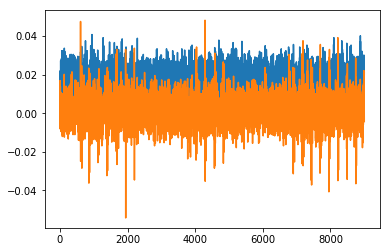

In [3]:
plt.plot(rawdata['ch1'][:9000]);
plt.plot(rawdata['ch2'][:9000]);

### Windowed std of ephys (considered as swim power)
* fltCh1
* fltCh2
* One can take log-scale of it in fitting(??)

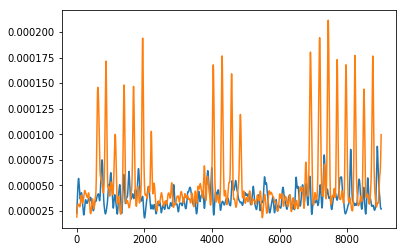

In [4]:
plt.plot(swimdata['fltCh1'][:9000]); 
plt.plot(swimdata['fltCh2'][:9000]);

In [12]:
from fish_proc.utils import ep

noise_thre = 2.5
(trial_index,trials)=ep.create_trial_inds2(rawdata)
swimStarts=swimdata['swimStartIndT']
swimEnds =swimdata['swimEndIndT']
swimDurs =swimEnds-swimStarts
stimParam=rawdata['stimParam3']+(rawdata['stimParam4']-1)*rawdata['stimParam3'].max()
p_sum_list = np.empty(len(trials))
p_sum_list[:] = 0

if isinstance(swimStarts,np.ndarray):
    for s in range(1,len(swimStarts)):
        ch1_partial=rawdata['ch1'][swimStarts[s]:swimEnds[s]]
        ch2_partial=rawdata['ch2'][swimStarts[s]:swimEnds[s]]
        ch1_max=(np.abs(ch1_partial-np.median(ch1_partial))).max()
        ch2_max=(np.abs(ch2_partial-np.median(ch2_partial))).max()
        trial=int(trials[swimStarts[s]])

        if (max(ch1_max,ch2_max)<noise_thre and swimDurs[s]>60 and trial>0):
            task_period=int(stimParam[swimStarts[s]])
            p1=(swimdata['fltCh1']-swimdata['back1'])[swimStarts[s]:swimEnds[s]].sum()
            p2=(swimdata['fltCh2']-swimdata['back2'])[swimStarts[s]:swimEnds[s]].sum()
            p_sum_list[swimStarts[s]]= p1*(p1>0)+p2*(p2>0)

CPU times: user 5.77 s, sys: 9.88 ms, total: 5.78 s
Wall time: 5.78 s


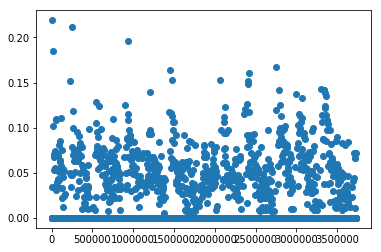

In [13]:
plt.plot(p_sum_list, 'o')

### Alignment between ephys and imaging times
* ch3

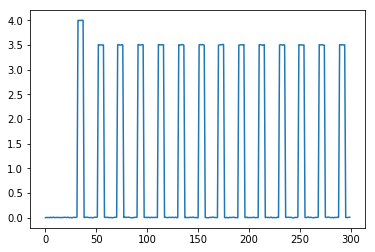

In [7]:
plt.plot(rawdata['ch3'][:300]);

### Visual signal `stimParam1`
* around zero -- static grating
* postive -- forward grating
* negative -- backward grating which mimics swims

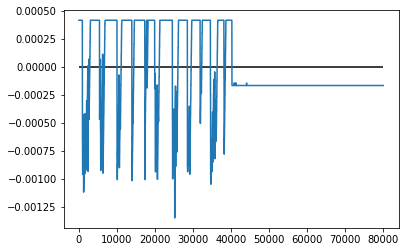

In [8]:
plt.plot(-rawdata['stimParam1'][120000:200000]);
plt.hlines(0, 0, 80000);

### Task parameter `stimParam3`
* 1 -- low gain 
* 2 -- high gain (7 sec, 15 sec, 30 sec)
* 3 -- memory-delay (10 sec)
* 4 -- test (5 sec)

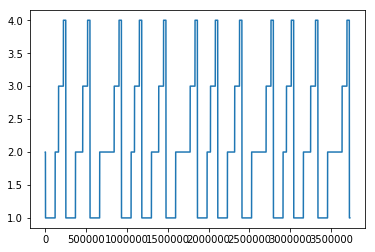

In [9]:
plt.plot(rawdata["stimParam3"]);

### Task type `stimParam4`
* 1 -- 7 sec
* 2 -- 15 sec
* 3 -- 30 sec

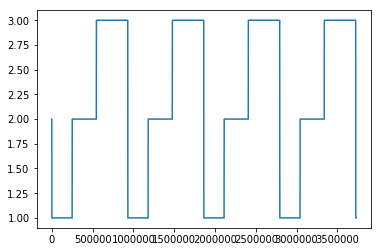

In [10]:
plt.plot(rawdata["stimParam4"]);

### Epoch id `stimParam5`

A full epoch consists of one 7 sec + one 15 sec + one 30 sec trials

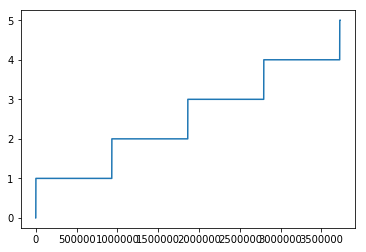

In [11]:
plt.plot(rawdata["stimParam5"]);